#**Importing the Required Libraries**

In [ ]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code
import os


In [ ]:
#glob is used to return all file paths that match a specific pattern.
import glob

In [ ]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [ ]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [ ]:
!nvidia-smi

Mon Sep  9 08:38:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
!pip install ultralytics==8.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 35.0 MB/s eta 0:00:00


##Checking whether YOLOv8 is Installed and its working Fine

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


#**Importing the Tomato Detection Dataset from Roboflow**

In [ ]:
!mkdir {HOME}/datasets


In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets


/content/datasets


In [ ]:
!pwd

/content/datasets


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CDf9JjxdEGwSYqBxpqe9")
project = rf.workspace("sylhet-agricultural-university").project("tomato-leaf-diseases-detect")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.6, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tomato-Leaf-DIseases-Detect-1 in yolov8:: 100%|██████████| 1486/1486 [00:00<00:00, 5145.02it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/datasets/Tomato-Leaf-DIseases-Detect-1


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [ ]:
import os
print(os.path.exists('/content/datasets/Tomato-Leaf-DIseases-Detect-1/train/images'))
print(os.path.exists('/content/datasets/Tomato-Leaf-DIseases-Detect-1/valid/images'))
print(os.path.exists('/content/datasets/Tomato-Leaf-DIseases-Detect-1/data.yaml'))

True
True
True


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data=/content/datasets/Tomato-Leaf-DIseases-Detect-1/data.yaml epochs=80 imgsz=640

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location="cpu"), file

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml  weights


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Displaying the Confusion Matrix**

/content


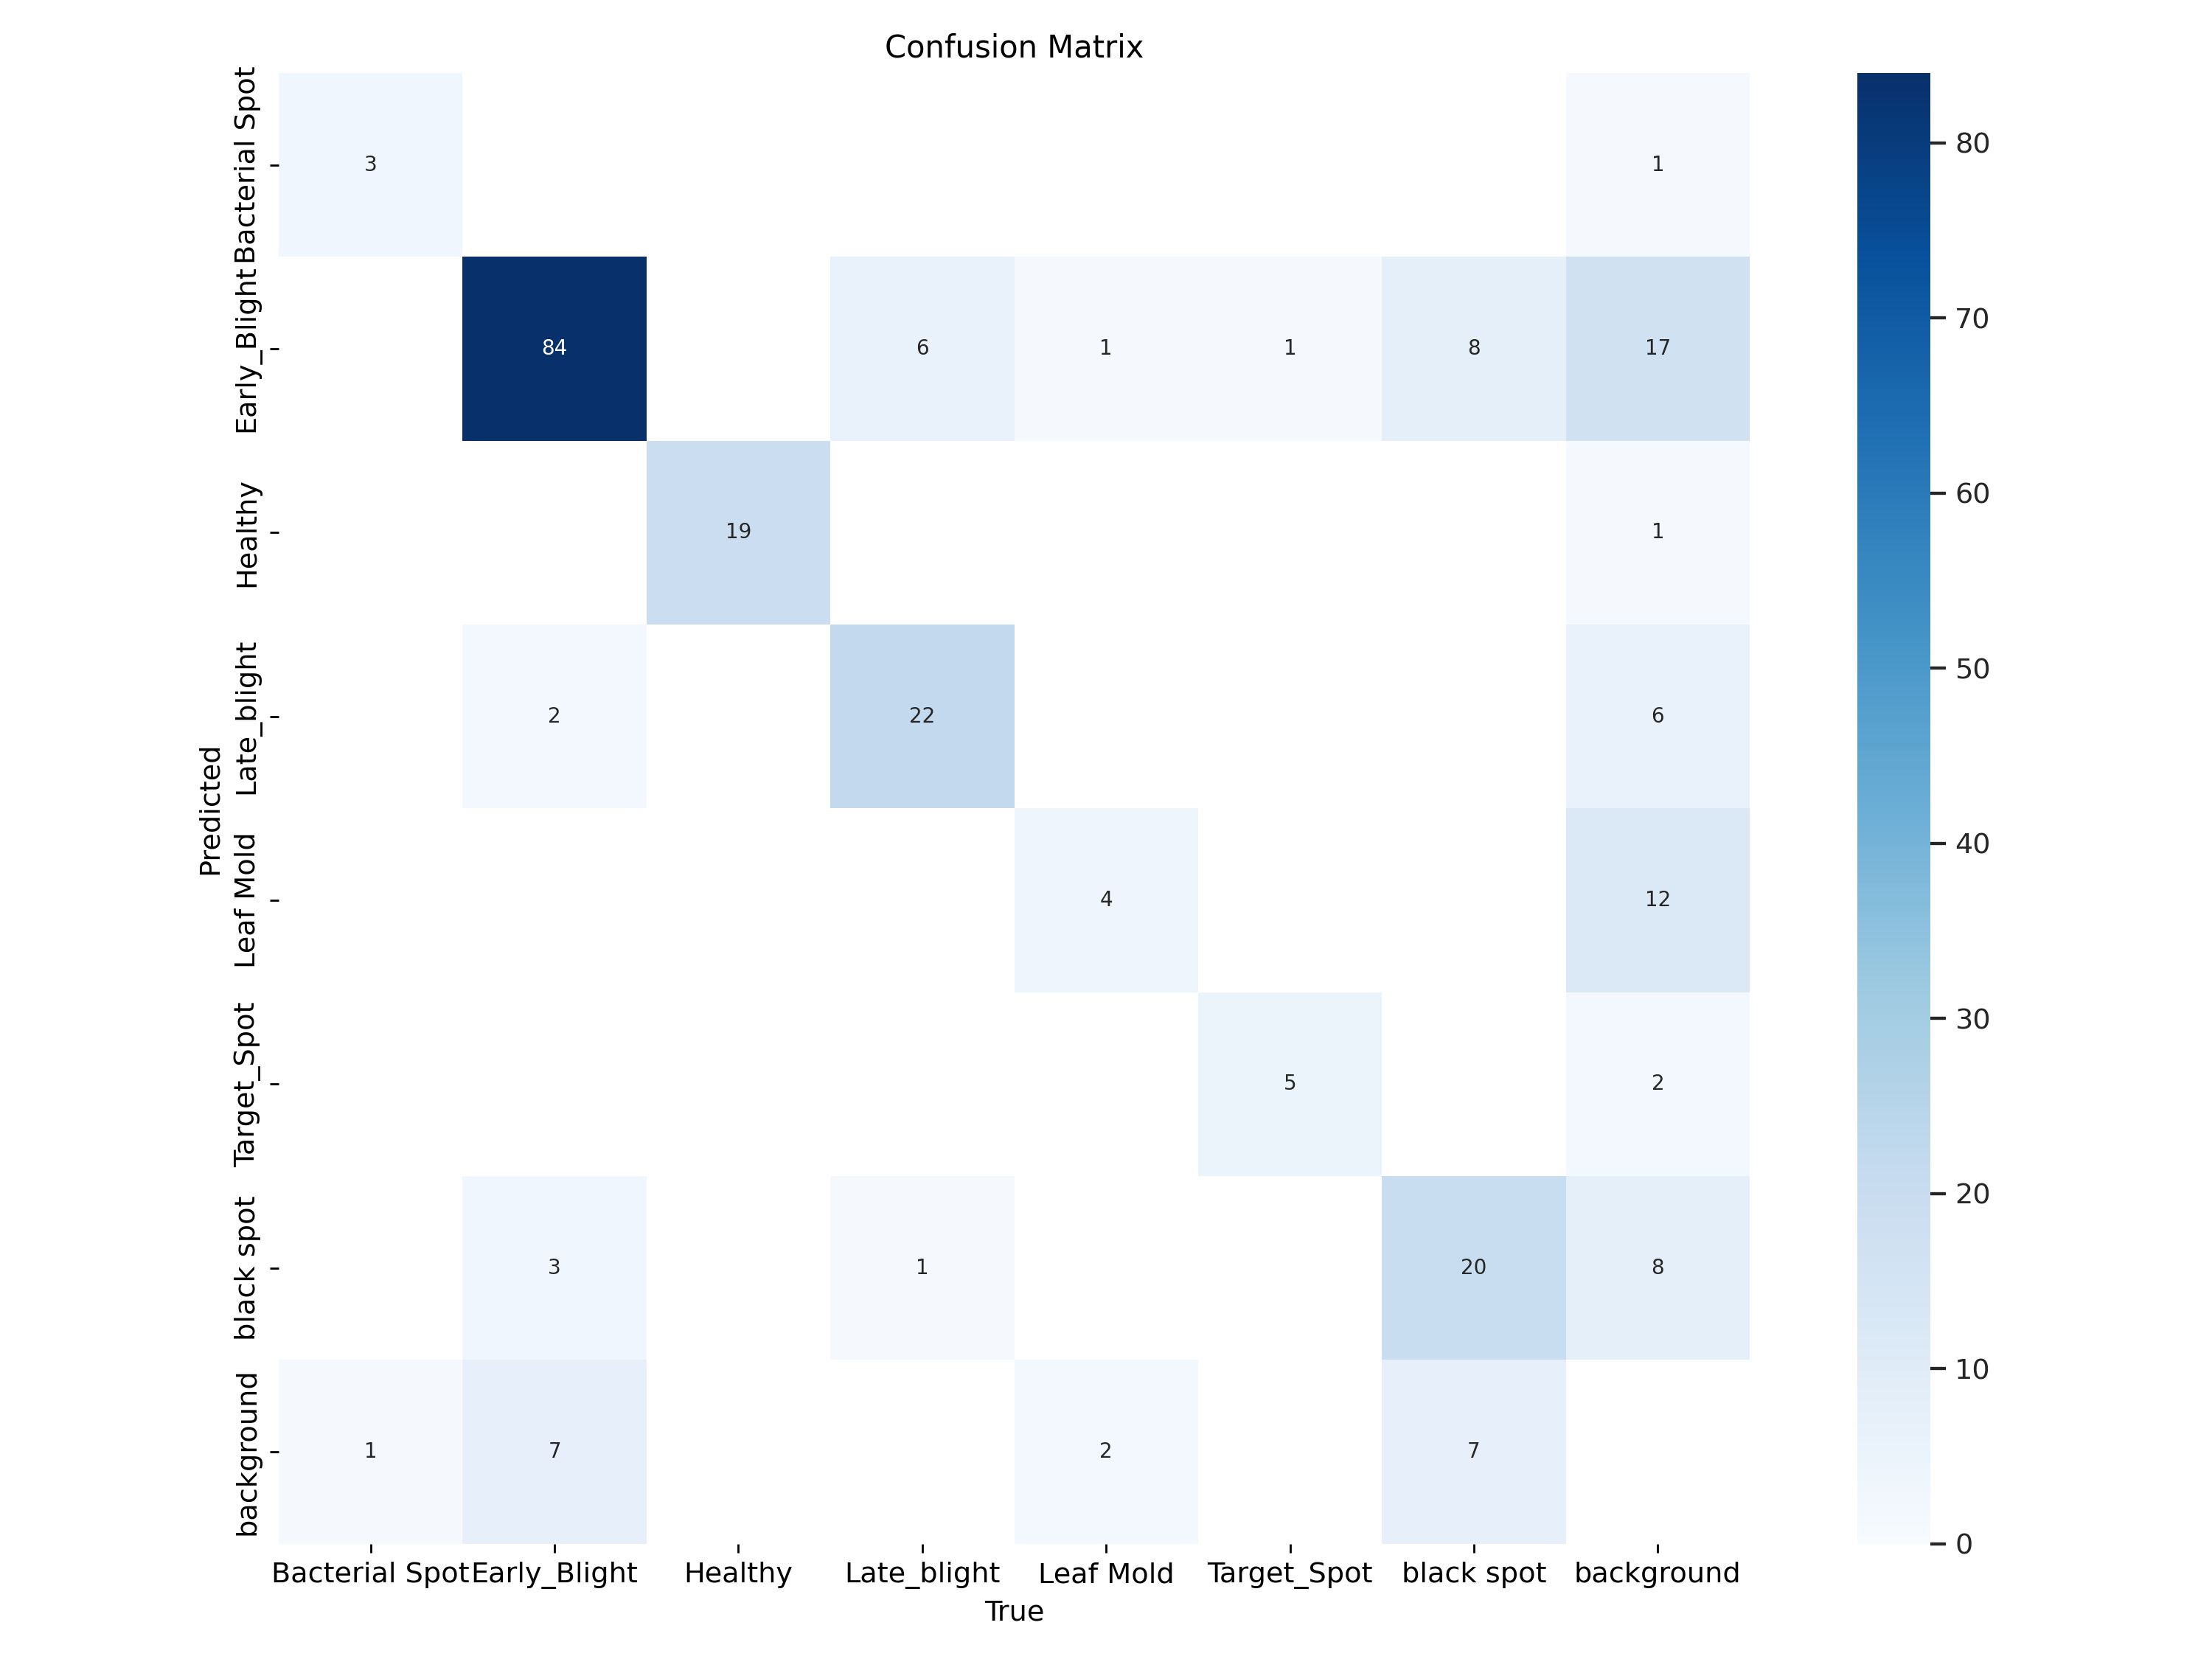

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#92% of the time the model detected correctly that the person is wearing jacket, while 1% of the time we get the Bounding Box but
#the jacket is incorrectly classified as Eye wear, while 7% of the time when person is wearing the Jacket the model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=900)
#Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=900)

#**F1 Curve**

/content


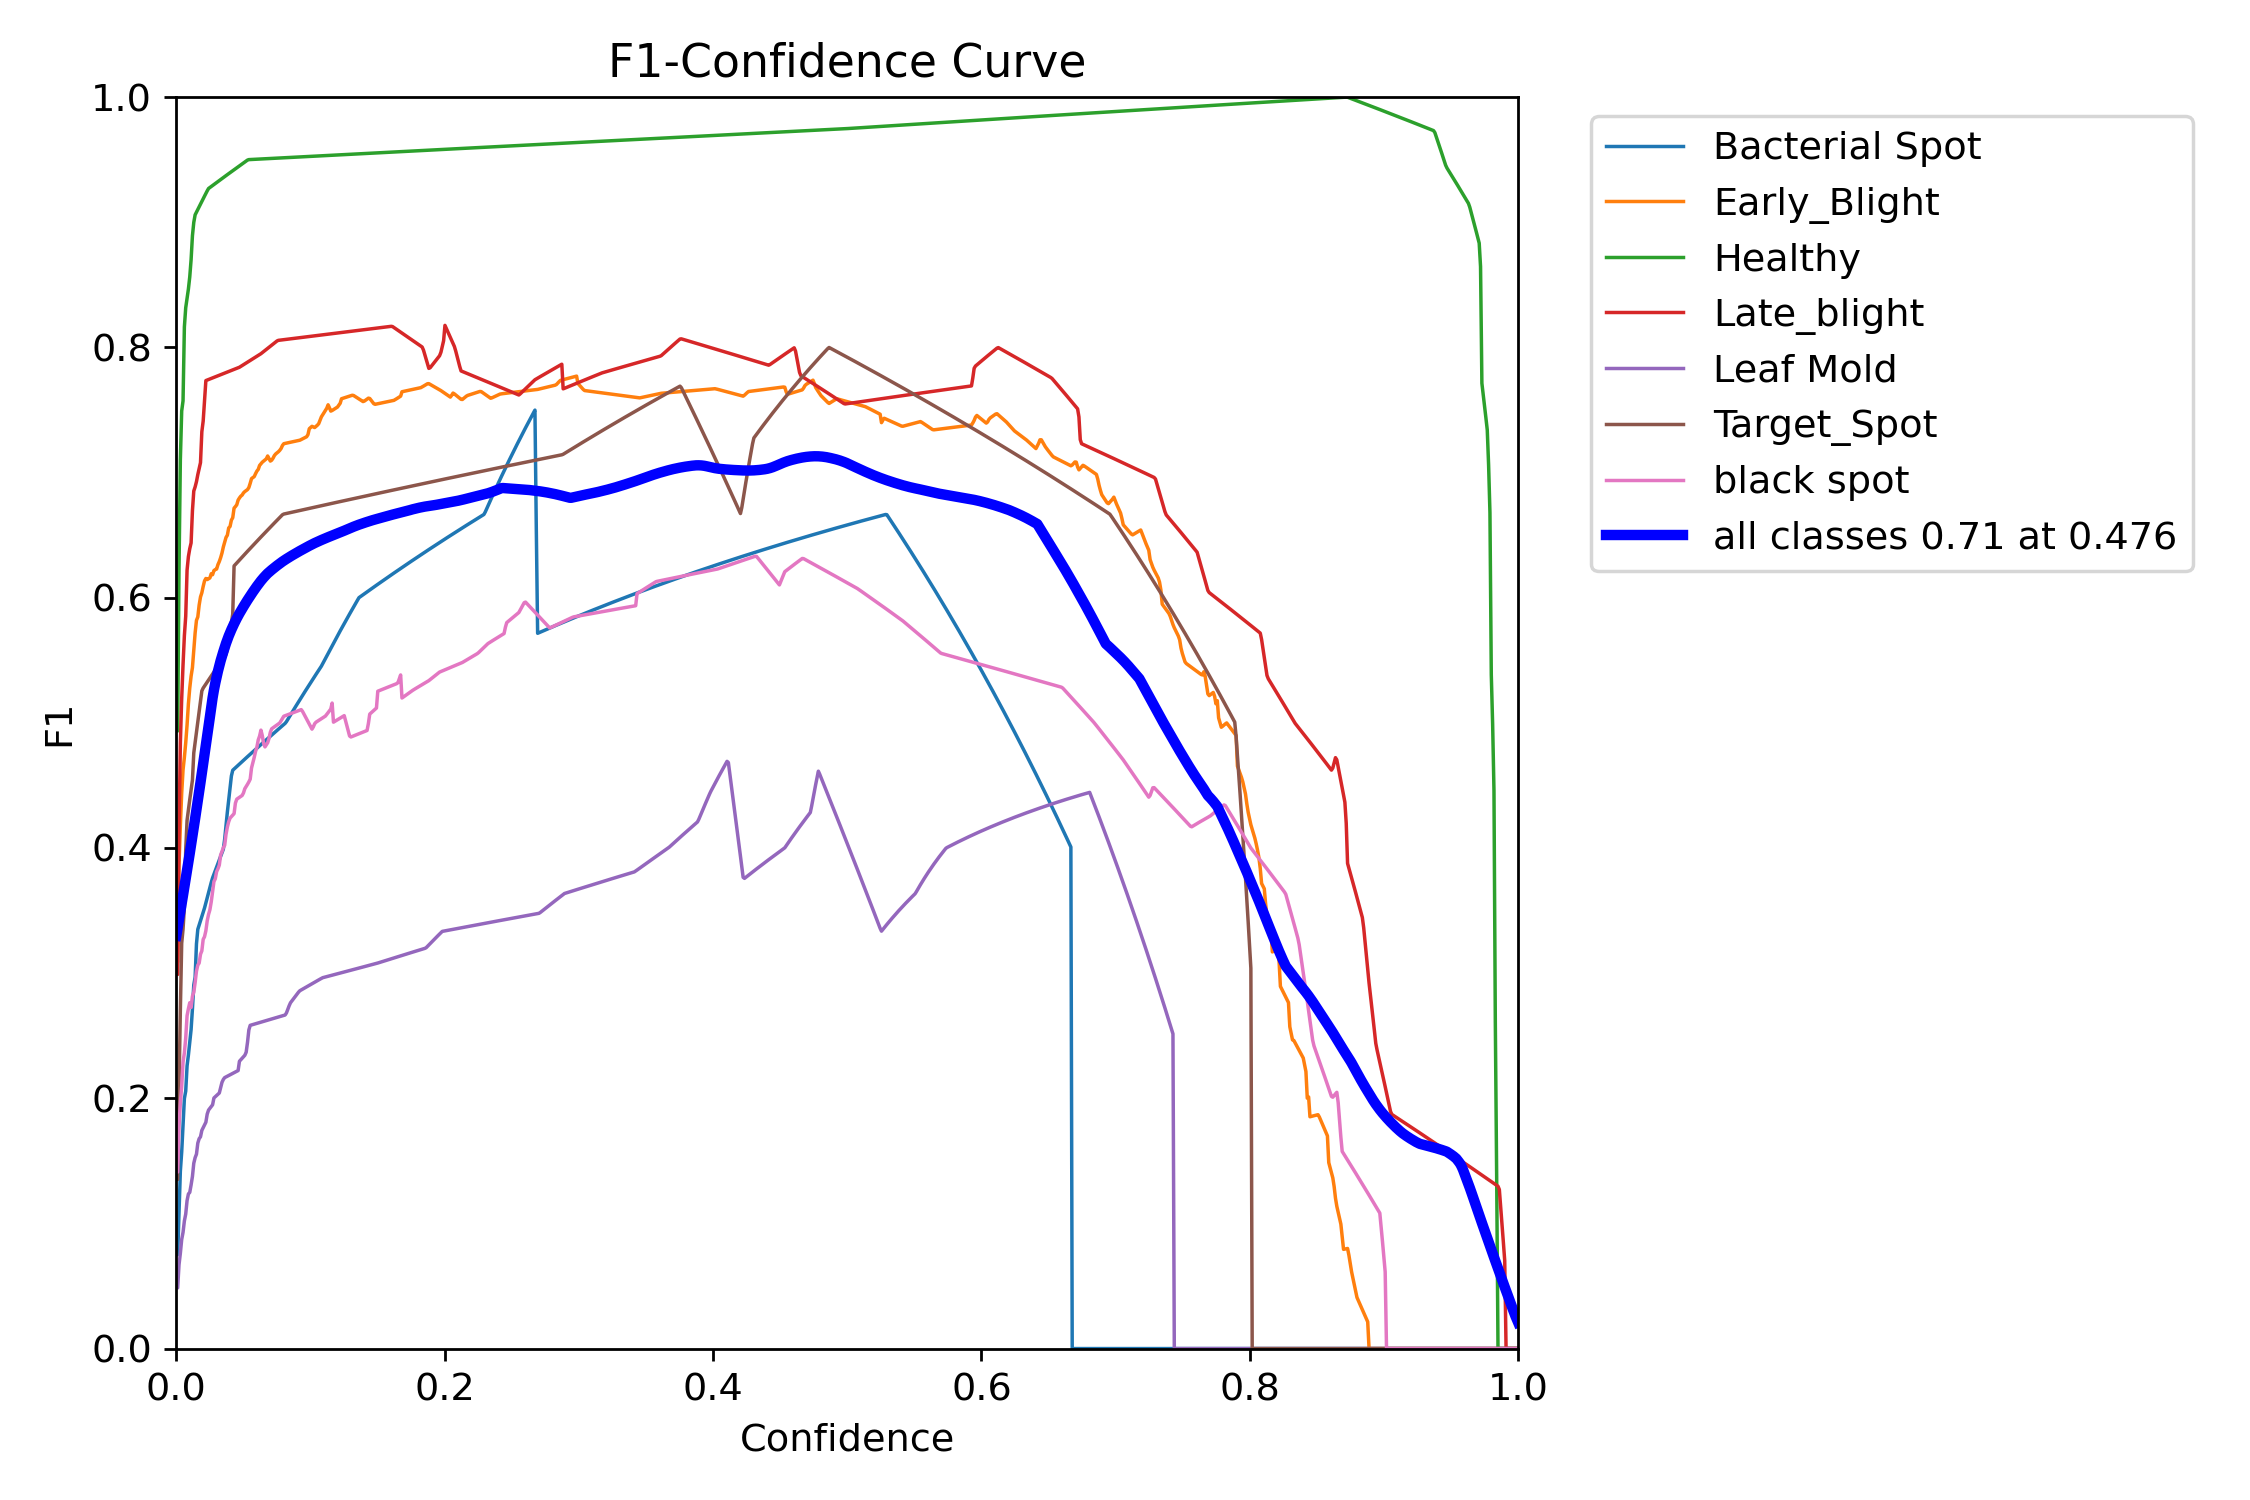

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/F1_curve.png', width=600)

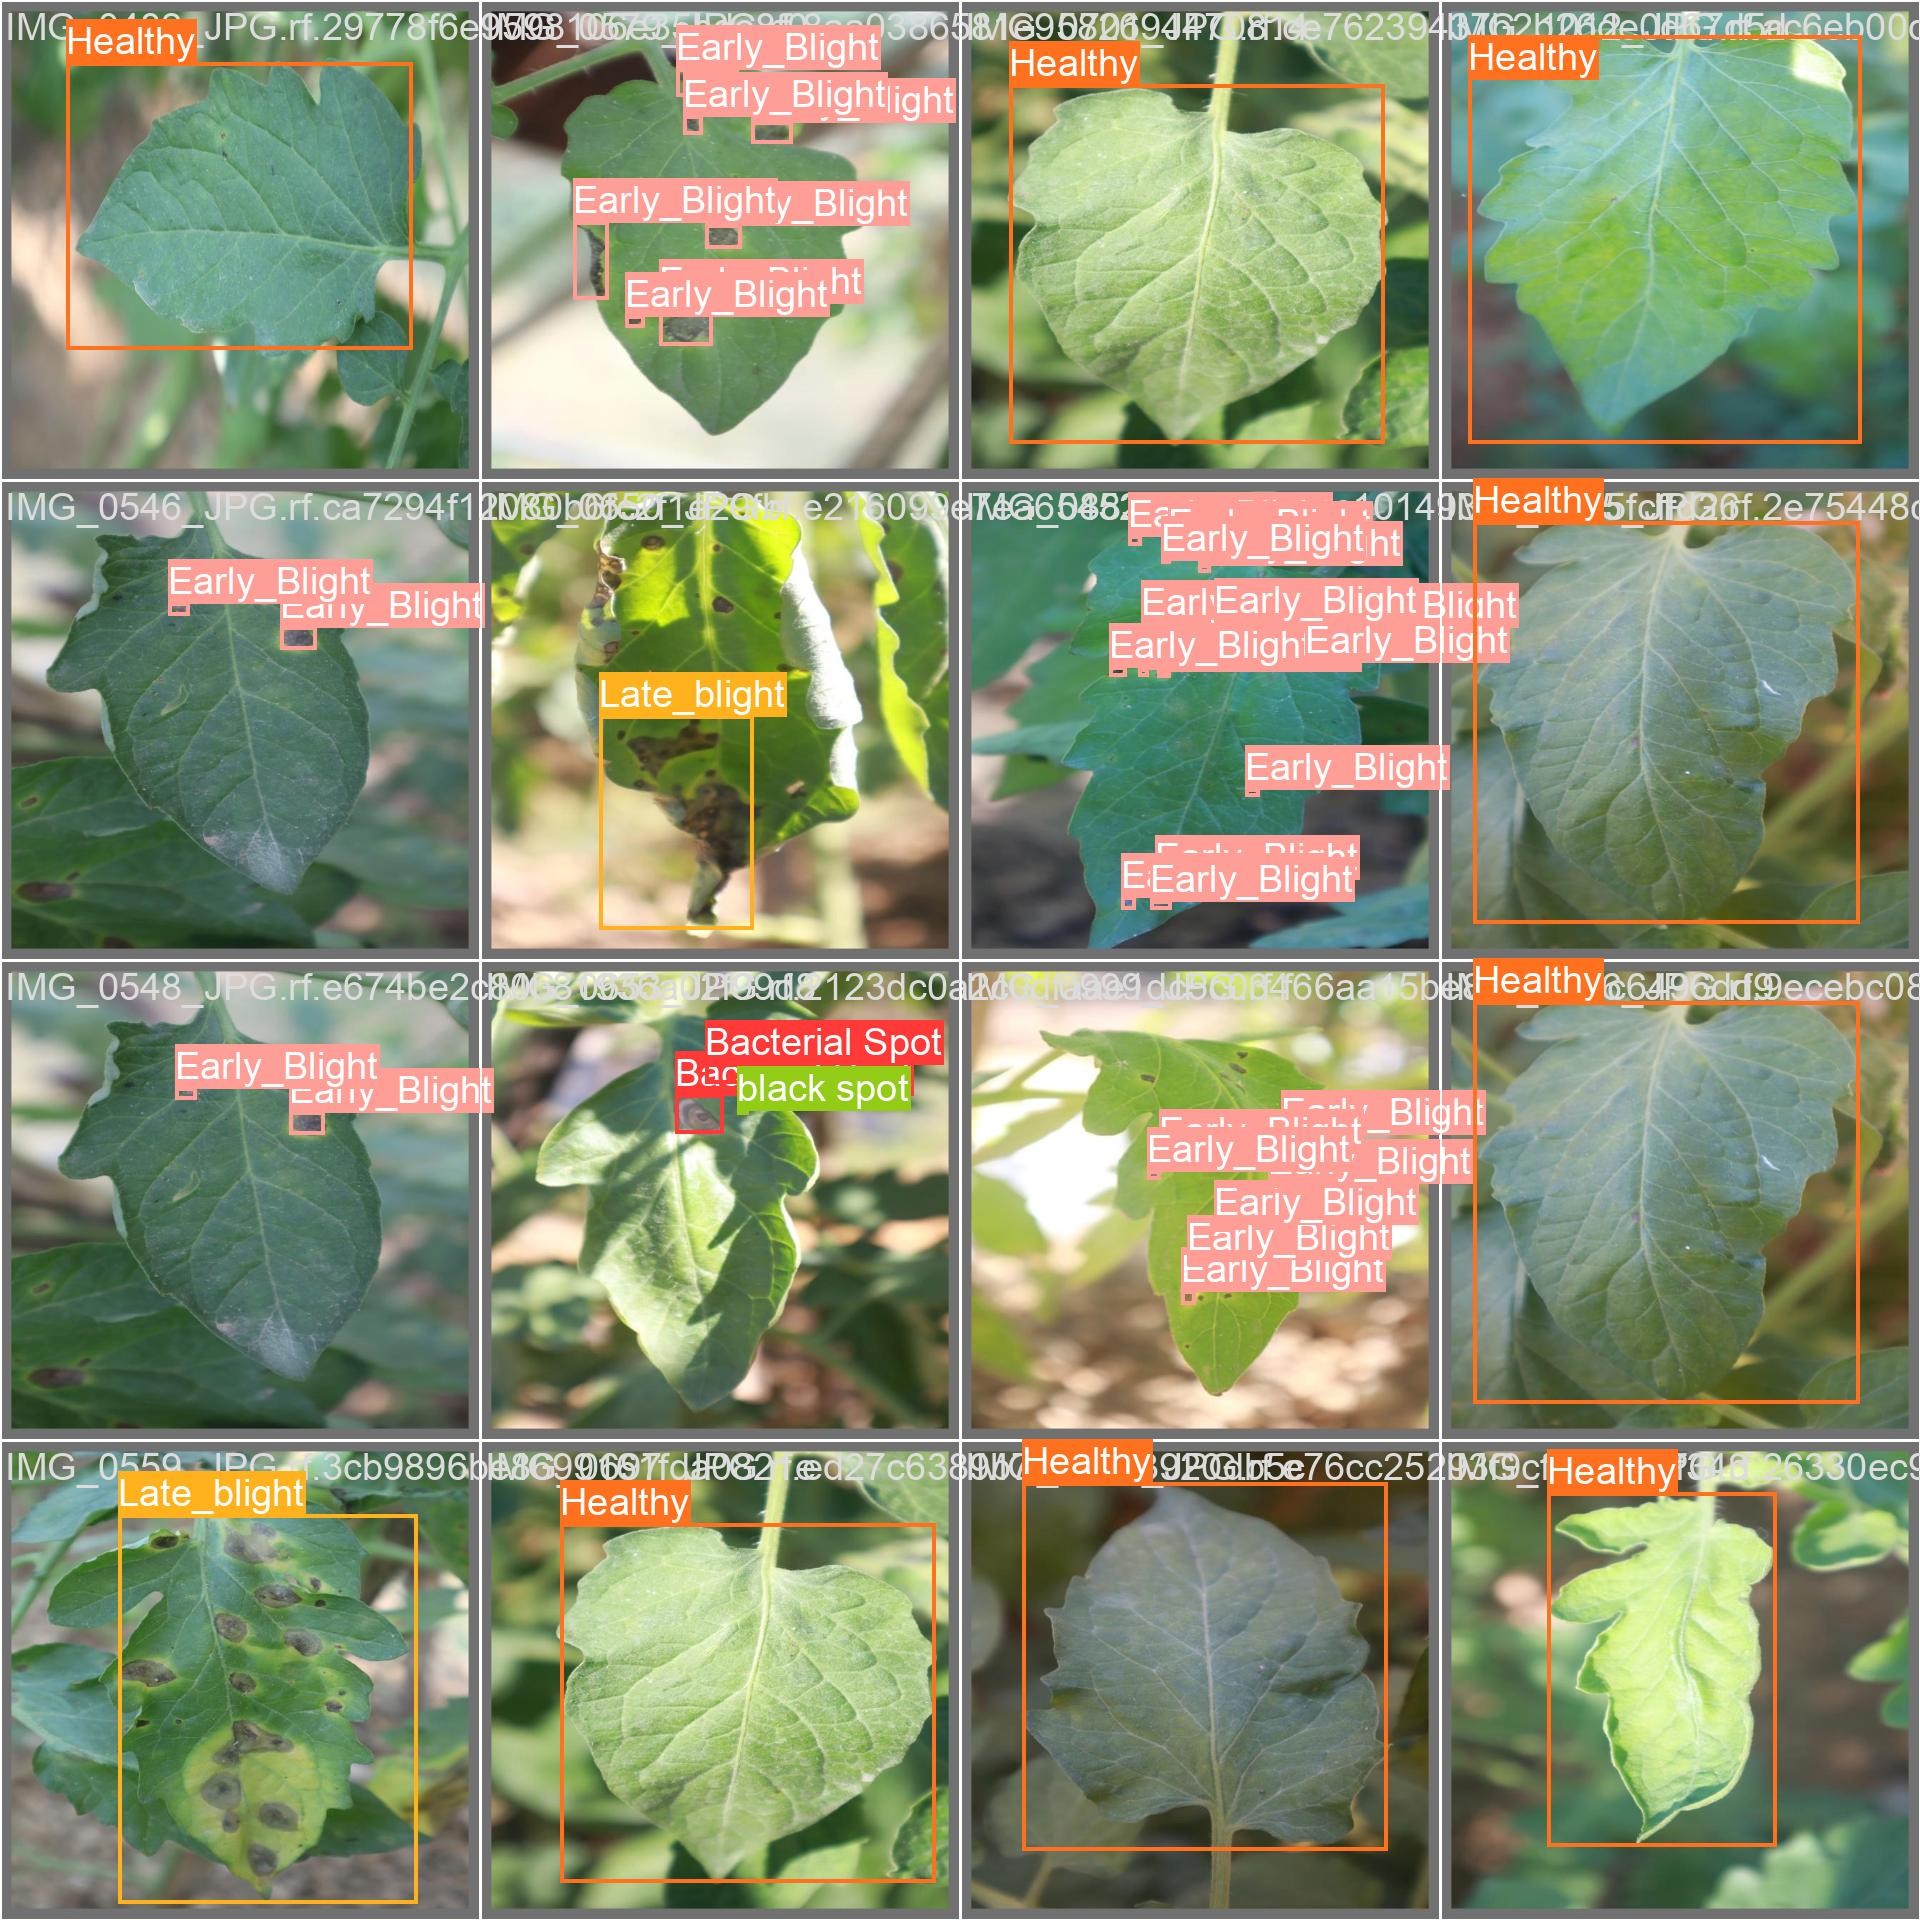

In [ ]:
import os
import shutil

# Google Drive에서 가져올 경로
src_path = "/content/drive/MyDrive/train5"

# 복사할 경로
dest_path = "/content/runs/detect/train5"

# 디렉토리가 없으면 생성
if not os.path.exists(dest_path):
    os.makedirs(dest_path)

# 파일 복사
shutil.copytree(src_path, dest_path, dirs_exist_ok=True)

# 이미지 파일 표시
from IPython.display import Image, display
display(Image(filename=f'{dest_path}/val_batch1_labels.jpg', width=600))

/content


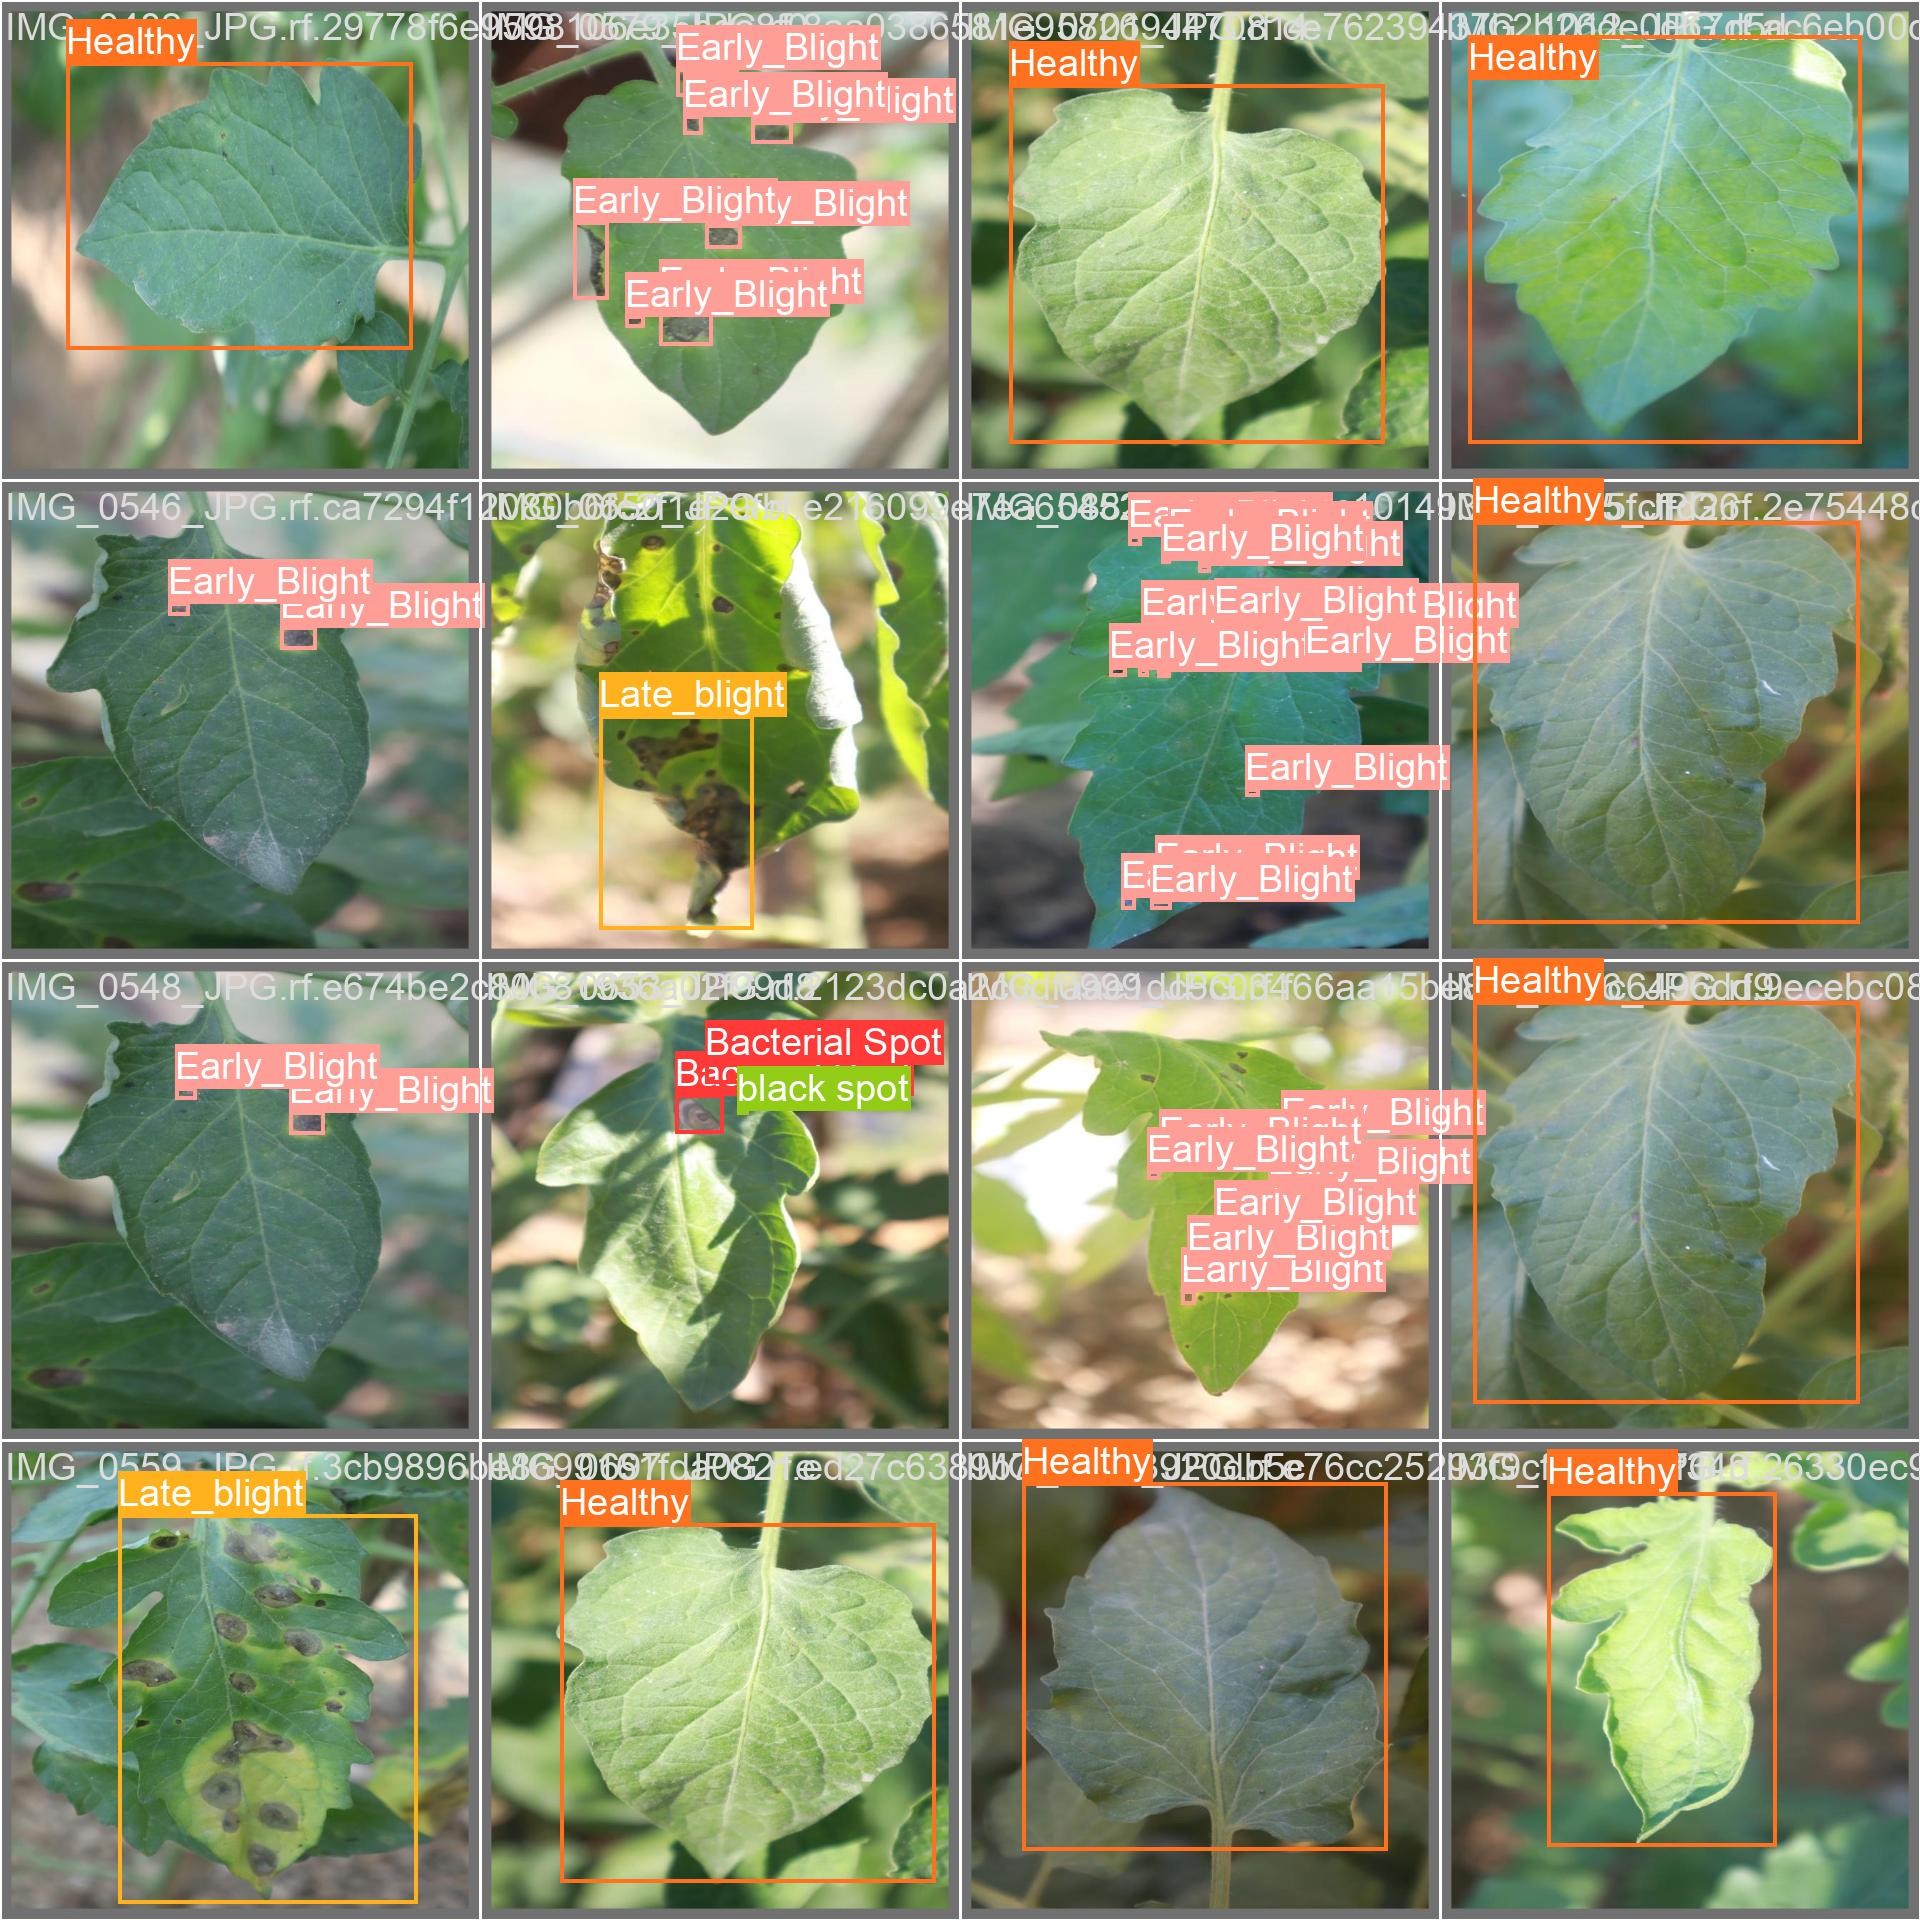

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch1_labels.jpg', width=600)

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


#**Testing on New Images**

In [ ]:
%cd {HOME}

#!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolo/model_file/best.pt conf=0.25 source='/content/drive/MyDrive/Yolo/tested images/tom_4.jpeg'
!yolo task=detect mode=predict model=/content/runs/detect/train5/train5/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Yolo/tom_5.jpeg'

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location="cpu"), file

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/predicted images/tom_5.jpeg', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/predicted images/tom_5.jpeg'